# Assignment 1

* Perform a basic statistical analysis of the time DOT 311 (table is call dot_311) complaints are open (subtract closed date from created date)

* Connect to the database to get the data and do the analysis. Submit the code through Github and type up your results in your PR.

In [28]:
!pip install pg8000

In [29]:
import pg8000
conn = pg8000.connect(host='training.c1erymiua9dx.us-east-1.rds.amazonaws.com', port = 5432, database = 'training', user = 'dot_student', password = 'qgis')

In [30]:
conn.rollback()

In [31]:
cursor = conn.cursor()

In [44]:
# getting the column names
cursor.execute("SELECT * FROM INFORMATION_SCHEMA.COLUMNS WHERE table_name = 'dot_311'")
columns=[]
for row in cursor.fetchall():
    columns.append(row[3])
print(columns)

['gid', 'unique_key', 'agency', 'agency nam', 'complaint', 'descriptor', 'location t', 'incident z', 'incident a', 'street nam', 'cross stre', 'cross st_1', 'intersecti', 'intersec_1', 'address ty', 'city', 'landmark', 'facility t', 'status', 'due date', 'resolution', 'resoluti_1', 'community', 'borough', 'x coordina', 'y coordina', 'park facil', 'park borou', 'school nam', 'school num', 'school reg', 'school cod', 'school pho', 'school add', 'school cit', 'school sta', 'school zip', 'school not', 'school or', 'vehicle ty', 'taxi compa', 'taxi pick', 'bridge hig', 'bridge h_1', 'road ramp', 'bridge h_2', 'garage lot', 'ferry dire', 'ferry term', 'latitude', 'longitude', 'location', 'geom', 'created_date', 'closed_date']


In [52]:
cursor.execute("SELECT unique_key, complaint, descriptor, borough, created_date, closed_date FROM dot_311")
complaints=[]
for row in cursor:
    complaints.append(row)

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import dateutil.parser

In [97]:
df = pd.DataFrame(complaints)
df.columns = ['unique_key','complaint','descriptor','borough','created_date','closed_date']

In [99]:
df.head()

,unique_key,complaint,descriptor,borough,created_date,closed_date
0,32570549,Traffic Signal Condition,Controller,STATEN ISLAND,2016-02-01 00:12:00,2016-02-01 01:15:00
1,32572958,Traffic Signal Condition,Controller,STATEN ISLAND,2016-02-01 00:14:00,2016-02-01 00:54:00
2,32573576,Traffic Signal Condition,Controller,STATEN ISLAND,2016-02-01 00:15:00,2016-02-01 01:30:00
3,32572389,Traffic Signal Condition,Controller,MANHATTAN,2016-02-01 00:17:00,2016-02-01 02:35:00
4,32570548,Traffic Signal Condition,Controller,MANHATTAN,2016-02-01 00:19:00,2016-02-01 01:00:00


In [114]:
# how fast the thing solved
df['hurryup'] = df['closed_date'] - df['created_date']

In [132]:
# make it as an index
df.index = df['hurryup']

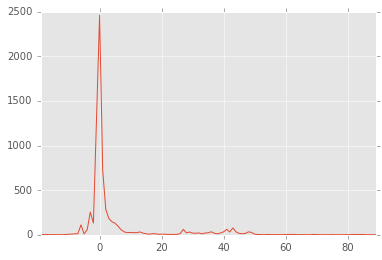

In [133]:
df.groupby(by=df.index.days)['unique_key'].count().plot()

Most of the complaints are solved within 0 day 00:00:00 which seems strange. Some are solved within time in negative form. 

In [134]:
df['hurryup'].describe()

count                       5650
mean      6 days 15:05:05.589380
std      14 days 12:05:38.260805
min           -19 days +09:29:00
25%              0 days 01:14:00
50%              0 days 21:48:15
75%       4 days 00:30:48.500000
max             89 days 18:54:00
Name: hurryup, dtype: object

In [153]:
def to_days(time):
    try:
        return time.days
    except:
        pass

In [154]:
df['hurryup_new'] = df['hurryup'].apply(to_days)

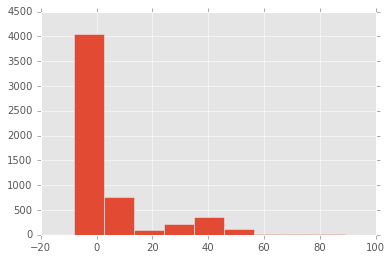

In [155]:
df['hurryup_new'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110dea9e8>]], dtype=object)

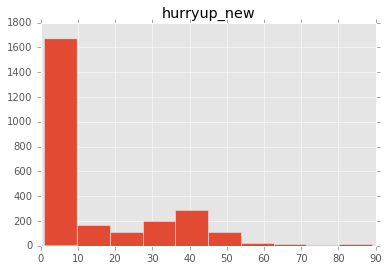

In [156]:
df[df['hurryup_new']>0].hist()